In [1]:
import numpy as np

In [2]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras==2.15.0

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

optimizer = tf.train.AdamOptimizer(learning_rate=0.001)



Instructions for updating:
non-resource variables are not supported in the long term



In [34]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns 


In [6]:
#CARGAR CONJUNTO DE DATOS

In [35]:
# Cargar los datos de entrenamiento
train_df = pd.read_csv('fashion-mnist_train.csv')
train_images = train_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
train_labels = train_df['label'].values

# Cargar los datos de prueba
test_df = pd.read_csv('fashion-mnist_test.csv')
test_images = test_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
test_labels = test_df['label'].values

In [8]:
#CONSTRUIR EL MODELO

In [37]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [38]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
#Entrenamiento del Modelo

In [40]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.5050 - acc: 0.8149

C:\Users\Diego\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


60000/60000 [==============================] - 27s 455us/sample - loss: 0.5048 - acc: 0.8150 - val_loss: 0.4058 - val_acc: 0.8493
Epoch 2/10
60000/60000 [==============================] - 27s 451us/sample - loss: 0.3259 - acc: 0.8826 - val_loss: 0.3046 - val_acc: 0.8913
Epoch 3/10
60000/60000 [==============================] - 27s 442us/sample - loss: 0.2789 - acc: 0.8983 - val_loss: 0.2660 - val_acc: 0.9044
Epoch 4/10
60000/60000 [==============================] - 27s 457us/sample - loss: 0.2482 - acc: 0.9091 - val_loss: 0.2552 - val_acc: 0.9077
Epoch 5/10
60000/60000 [==============================] - 27s 451us/sample - loss: 0.2212 - acc: 0.9179 - val_loss: 0.2765 - val_acc: 0.8998
Epoch 6/10
60000/60000 [==============================] - 27s 455us/sample - loss: 0.2020 - acc: 0.9247 - val_loss: 0.2507 - val_acc: 0.9088
Epoch 7/10
60000/60000 [==============================] - 27s 453us/sample - loss: 0.1858 - acc: 0.9313 - val_loss: 0.2385 - val_acc: 0.9168
Epoch 8/10
60000/60000 [

In [17]:
#Realizar Predicciones y Evaluar con las Matrices de Confusión

C:\Users\Diego\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


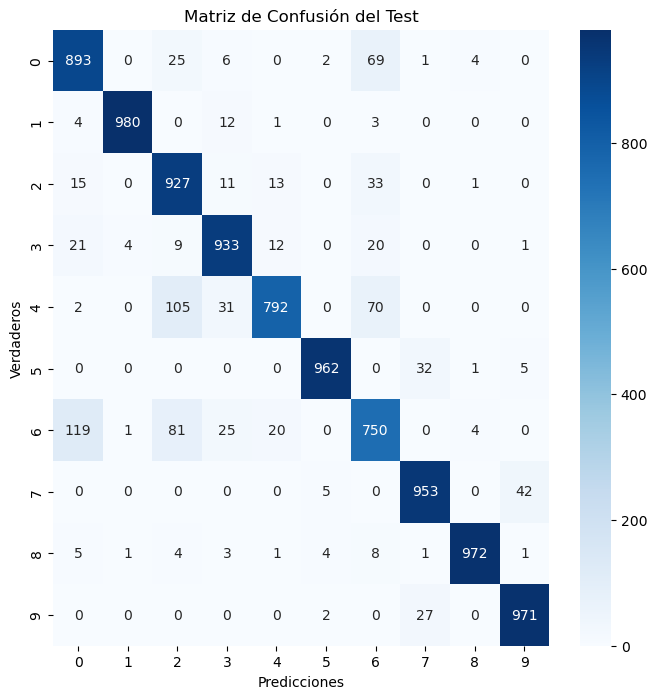

In [41]:
# Predicciones para el conjunto de prueba
y_test_pred = model.predict(test_images)
y_test_labels_pred = np.argmax(y_test_pred, axis=1)

# Matriz de confusión para el conjunto de prueba
conf_matrix_test = confusion_matrix(test_labels, y_test_labels_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusión del Test')
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos')
plt.show()
